In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mt5-base-20-ente/final2_train.tsv
/kaggle/input/mt5-base-20-ente/final1_test.tsv
/kaggle/input/mt5-base-20-ente/final2_test.tsv


In [2]:
! pip install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.5/250.5 kB 1.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 26.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 48.0 MB/s eta 0:00:0000:01:00:01
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16180 sha256=4a803ec2e4532374b5099878308751e3415186485547c59eb15958b3f3237592
  Stored in directory: /root/.cache/pip/wheels/05/96/ee/7cac4e74f3b19e3158dce26a20a1c86b3533c43ec72a549fd7
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19582 sha256=4a1eea29987f89549aac6cade9b755a82a3607f675dc41221a8e90d95c619839
  Stored in directory: /root/.cache/pip/wheels/5f/55/ab/36a76989f7f88d9

In [3]:
import logging
import pandas as pd
from simpletransformers.t5 import T5Model, T5Args

print("LOADED LIBS")
logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

print("LOADING DATASETS")
train_df = pd.read_csv("../input/mt5-base-20-ente/final2_train.tsv", sep='\t').astype(str)
test_df = pd.read_csv("../input/mt5-base-20-ente/final2_test.tsv", sep='\t').astype(str)
print("LOADED DATASETS SUCCESSFULLY")


train_df["prefix"] = ""
test_df["prefix"] = ""

model_args = T5Args()
model_args.max_seq_length = 96
model_args.train_batch_size = 10
model_args.eval_batch_size = 10
model_args.num_train_epochs = 5
model_args.evaluate_during_training = True
model_args.evaluate_during_training_steps = 30000
model_args.use_multiprocessing = False
model_args.fp16 = False
model_args.save_steps = -1
model_args.save_eval_checkpoints = False
model_args.no_cache = True
model_args.reprocess_input_data = True
model_args.overwrite_output_dir = True
model_args.preprocess_inputs = False
model_args.num_return_sequences = 1
#model_args.wandb_project = "MT5 Hindi-English Translation"

model = T5Model("mt5", "google/mt5-base", args=model_args, use_cuda=True)
print("TRAINING THE MODEL NOW")
model.train_model(train_df, output_dir="./Outputs/", eval_data=test_df)
print("MODEL TRAINING DONE")

LOADED LIBS
LOADING DATASETS
LOADED DATASETS SUCCESSFULLY


Downloading:   0%|          | 0.00/702 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.17G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.11M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/376 [00:00<?, ?B/s]

TRAINING THE MODEL NOW


  0%|          | 0/10000 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:3557: FutureWarning: 
`prepare_seq2seq_batch` is deprecated and will be removed in version 5 of HuggingFace Transformers. Use the regular
`__call__` method to prepare your inputs and the tokenizer under the `as_target_tokenizer` context manager to prepare
your targets.

Here is a short example:

model_inputs = tokenizer(src_texts, ...)
with tokenizer.as_target_tokenizer():
    labels = tokenizer(tgt_texts, ...)
model_inputs["labels"] = labels["input_ids"]

See the documentation of your specific tokenizer for more details on the specific arguments to the tokenizer of choice.
For a more complete example, see the implementation of `prepare_seq2seq_batch`.

  warnings.warn(formatted_warning, FutureWarning)


Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

MODEL TRAINING DONE


In [ ]:
import numpy as np
import pandas as pd
import math
import math
import os

In [4]:
! pip install sacrebleu
! pip install evaluate
! pip install rouge_score
! pip install jiwer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 917.0 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 794.8 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24955 sha256=75abd1cdecc1e29334d29fe249d101444e2ef895534409dc94bce10aa0daa3e6
  Stored in directory: /root/.cache/pip/wheels/84/ac/6b/38096e3c5bf1dc87911e3585875e21a3ac610348e740409c76
Successfully built rouge_score
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 4.8 MB/s eta 0:00:00a 0:00:010m
  Attempting uninstall: levenshtein
    Found existing installation: Levenshtein 0.20.7
    Uninstalling Levenshtein-0.20.7:
      Successfully uninstalled Levenshtein-0.20.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
python-levenshtein 0.20.7 requires Levensh

In [5]:
# Load inputs and targets
test_df = pd.read_csv("../input/mt5-base-20-ente/final1_test.tsv", sep='\t').astype(str)
test_dash_df = pd.read_csv("../input/mt5-base-20-ente/final2_test.tsv", sep='\t').astype(str)

telugu_truth = test_df.loc[test_df["prefix"] == "translate english to indic"]["target_text"].tolist()
to_telugu = test_df.loc[test_df["prefix"] == "translate english to indic"]["input_text"].tolist()
telugu_dash_truth = test_dash_df.loc[test_dash_df["prefix"] == "translate english to indic"]["target_text"].tolist()
to_telugu_dash = test_dash_df.loc[test_dash_df["prefix"] == "translate english to indic"]["input_text"].tolist()

english_truth = test_df.loc[test_df["prefix"] == "translate indic to english"]["target_text"].tolist()
to_english = test_df.loc[test_df["prefix"] == "translate indic to english"]["input_text"].tolist()
english_dash_truth = test_dash_df.loc[test_dash_df["prefix"] == "translate indic to english"]["target_text"].tolist()
to_english_dash = test_dash_df.loc[test_dash_df["prefix"] == "translate indic to english"]["input_text"].tolist()

In [6]:
print(len(telugu_truth))
print(len(english_truth))
print(len(telugu_dash_truth))
print(len(english_dash_truth))

1000
1000
1000
1000


In [7]:
# Expand string to list of strings to pass as references in evaluation metric function calls
def str_to_list_of_str(lang_truth):
    expanded_lang_truth = []
    for t in lang_truth:
        temp = []
        temp.append(t)
        expanded_lang_truth.append(temp)
    return expanded_lang_truth

expanded_telugu_truth = str_to_list_of_str(telugu_truth)
expanded_english_truth = str_to_list_of_str(english_truth)
expanded_telugu_dash_truth = str_to_list_of_str(telugu_dash_truth)
expanded_english_dash_truth = str_to_list_of_str(english_dash_truth)

In [8]:
# Load evaluation models
import evaluate
sacrebleu = evaluate.load("sacrebleu")
chrf = evaluate.load("chrf")
rouge = evaluate.load("rouge")
ter = evaluate.load("ter")
wer = evaluate.load("wer")

In [9]:
# Load model predictions
telugu_preds = model.predict(to_telugu)
english_preds = model.predict(to_english)

telugu_dash_preds = model.predict(to_telugu_dash)
english_dash_preds = model.predict(to_english_dash)

Generating outputs:   0%|          | 0/100 [00:00<?, ?it/s]

/opt/conda/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:3557: FutureWarning: 
`prepare_seq2seq_batch` is deprecated and will be removed in version 5 of HuggingFace Transformers. Use the regular
`__call__` method to prepare your inputs and the tokenizer under the `as_target_tokenizer` context manager to prepare
your targets.

Here is a short example:

model_inputs = tokenizer(src_texts, ...)
with tokenizer.as_target_tokenizer():
    labels = tokenizer(tgt_texts, ...)
model_inputs["labels"] = labels["input_ids"]

See the documentation of your specific tokenizer for more details on the specific arguments to the tokenizer of choice.
For a more complete example, see the implementation of `prepare_seq2seq_batch`.

  warnings.warn(formatted_warning, FutureWarning)


Decoding outputs:   0%|          | 0/1000 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/100 [00:00<?, ?it/s]

Decoding outputs:   0%|          | 0/1000 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/100 [00:00<?, ?it/s]

Decoding outputs:   0%|          | 0/1000 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/100 [00:00<?, ?it/s]

Decoding outputs:   0%|          | 0/1000 [00:00<?, ?it/s]

In [10]:
## BLEU
en_te_results_bleu = sacrebleu.compute(predictions=telugu_preds, references=expanded_telugu_truth)
print("BLEU SCORE--------Orig Target")
print("English to Telugu")
print(en_te_results_bleu['score'])

te_en_results_bleu = sacrebleu.compute(predictions=english_preds, references=expanded_english_truth)
print("Telugu to English")
print(te_en_results_bleu['score'])


en_te_dash_results_bleu = sacrebleu.compute(predictions=telugu_dash_preds, references=expanded_telugu_dash_truth)
print("\n\nBLEU SCORE--------Dash Target")
print("English to Telugu")
print(en_te_dash_results_bleu['score'])

te_en_dash_results_bleu = sacrebleu.compute(predictions=english_dash_preds, references=expanded_english_dash_truth)
print("Telugu to English")
print(te_en_dash_results_bleu['score'])


BLEU SCORE--------Orig Target
English to Telugu
0.01545542236007871
Telugu to English
0.2367503760208664


BLEU SCORE--------Dash Target
English to Telugu
0.027631838541011772
Telugu to English
1.7926644517037937


In [11]:
## CHRF++ 
en_te_results_chrf = chrf.compute(predictions=telugu_preds, references=expanded_telugu_truth, word_order=2)
print("CHRF++ SCORE--------Orig Target")
print("English to Telugu")
print(en_te_results_chrf['score'])

te_en_results_chrf = chrf.compute(predictions=english_preds, references=expanded_english_truth, word_order=2)
print("Telugu to English")
print(te_en_results_chrf['score'])

en_te_dash_results_chrf = chrf.compute(predictions=telugu_dash_preds, references=expanded_telugu_dash_truth, word_order=2)
print("\n\nCHRF++ SCORE--------Dash Target")
print("English to Telugu")
print(en_te_dash_results_chrf['score'])

te_en_dash_results_chrf = chrf.compute(predictions=english_dash_preds, references=expanded_english_dash_truth, word_order=2)
print("Telugu to English")
print(te_en_dash_results_chrf['score'])

CHRF++ SCORE--------Orig Target
English to Telugu
5.150856955332573
Telugu to English
4.30528280223732


CHRF++ SCORE--------Dash Target
English to Telugu
5.79137021784978
Telugu to English
14.562610522314504


In [12]:
# TER
en_te_results_ter = ter.compute(predictions=telugu_preds, references=expanded_telugu_truth)
print("TER SCORE--------Orig Target")
print("English to Telugu")
print(en_te_results_ter['score'])

te_en_results_ter = ter.compute(predictions=english_preds, references=expanded_english_truth)
print("Telugu to English")
print(te_en_results_ter['score'])

en_te_dash_results_ter = ter.compute(predictions=telugu_dash_preds, references=expanded_telugu_dash_truth)
print("\n\nTER SCORE--------Dash target")
print("English to Telugu")
print(en_te_dash_results_ter['score'])

te_en_dash_results_ter = ter.compute(predictions=english_dash_preds, references=expanded_english_dash_truth)
print("Telugu to English")
print(te_en_dash_results_ter['score'])

TER SCORE--------Orig Target
English to Telugu
99.35602575896965
Telugu to English
97.34595892237931


TER SCORE--------Dash target
English to Telugu
97.1319871232075
Telugu to English
89.79061082955455


In [13]:
# ROUGE
en_te_results_rouge = rouge.compute(predictions=telugu_preds, references=expanded_telugu_truth)
print("Rouge SCORE--------Orig target")
print("English to Telugu")
print(en_te_results_rouge)

te_en_results_rouge = rouge.compute(predictions=english_preds, references=expanded_english_truth)
print("Telugu to English")
print(te_en_results_rouge)

en_te_dash_results_rouge = rouge.compute(predictions=telugu_dash_preds, references=expanded_telugu_dash_truth)
print("\n\nRouge SCORE--------Dash Target")
print("English to Telugu")
print(en_te_dash_results_rouge)

te_en_dash_results_rouge = rouge.compute(predictions=english_dash_preds, references=expanded_english_dash_truth)
print("Telugu to English")
print(te_en_dash_results_rouge)

Rouge SCORE--------Orig target
English to Telugu
{'rouge1': 0.05009018133569215, 'rouge2': 0.004998739495798319, 'rougeL': 0.049811362493715414, 'rougeLsum': 0.049309477124182995}
Telugu to English
{'rouge1': 0.061403389008483494, 'rouge2': 0.016645802811202596, 'rougeL': 0.05444809189320304, 'rougeLsum': 0.054303786103681966}


Rouge SCORE--------Dash Target
English to Telugu
{'rouge1': 0.05009018133569215, 'rouge2': 0.004998739495798319, 'rougeL': 0.049811362493715414, 'rougeLsum': 0.049309477124182995}
Telugu to English
{'rouge1': 0.2274165474716437, 'rouge2': 0.06226686196293517, 'rougeL': 0.19055330422673206, 'rougeLsum': 0.19056718908278464}


In [14]:
print(model.predict(["I am Ganesh"]))

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Decoding outputs:   0%|          | 0/1 [00:00<?, ?it/s]

['నాకుఆఉ గర్భవతిఇఇ నందలిఅంఇ నేనుఏ']


In [15]:
print(model.predict(["I am working as a doctor in AIMS hospital, Delhi"]))

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Decoding outputs:   0%|          | 0/1 [00:00<?, ?it/s]

['ఢిల్లీలోనిఇఈఓఇ అమెరికాఎఇఆ హాస్పిటల్']


In [16]:
print(model.predict(["Outputs for MT5 model"]))

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Decoding outputs:   0%|          | 0/1 [00:00<?, ?it/s]

['మోడల్ఓ మోడల్ఓ మోడల్ఓ కోసంఓఅం మోడ']


In [17]:
print(model.predict(["నాకు మామిడి పండు అంటే చాలా ఇష్టం"]))

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Decoding outputs:   0%|          | 0/1 [00:00<?, ?it/s]

['Since my grandparents always wanted to always smell onion.']


In [18]:
print(model.predict(["నీ పేరు ఏమిటి"]))

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Decoding outputs:   0%|          | 0/1 [00:00<?, ?it/s]

['నీఈ యేఏ నీఈ యేఏ యేఏ యేఏ యేఏ']


In [19]:
print(model.predict(["ప్రభుత్వ కంపెనీలో ఉద్యోగం చేస్తున్నాడు"]))

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Decoding outputs:   0%|          | 0/1 [00:00<?, ?it/s]

['మంత్రిఅంఇ డైరెక్టర్ఐఎ డైరెక్టర్ఐఎ డై']


In [20]:
print(model.predict(["ఢిల్లీలోనిఇఈఓఇ అమెరికాఎఇఆ హాస్పిటల్"]))

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Decoding outputs:   0%|          | 0/1 [00:00<?, ?it/s]

['The hospital in Delhi is a hospital in Delhi, a hospital in Delhi, a']


In [21]:
print(model.predict(["ఆయన పేరు నేనెత్తను, ఆయన నామమును బట్టి ప్రకటింపను"]))

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Decoding outputs:   0%|          | 0/1 [00:00<?, ?it/s]

['"""""""I will appoint you, and shall appoint him, """"I']


In [22]:
print(model.predict(["ఆయన పేరుఏఉ నేనెత్తను,ఏఎఉ ఆయన నామమునుఆఉఉ బట్టిఇ ప్రకటింపను"]))

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Decoding outputs:   0%|          | 0/1 [00:00<?, ?it/s]

['"""""""I will appoint you, and shall appoint him, """"I']


In [23]:
print(model.predict(["అయితేఇఏ ఓటర్ల జాబితాలోఆఇఆఓ ఆప్ కార్యకర్తలకుఆఉ ఒకటికన్నాఇఆ ఎక్కువఉ ఎంట్రీలున్నాయనిఅంఈఉఆఇ బిజెపిఇఎఇ అద్యక్షుడుఉఉ అమిత్ఇ షాఆ ఆరోపించారుఓఇఅంఆఉ"]))

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Decoding outputs:   0%|          | 0/1 [00:00<?, ?it/s]

['The BJP chief Amit Shah had filed a list of candidates while']


In [1]:
import matplotlib.pyplot as plt
import numpy as np

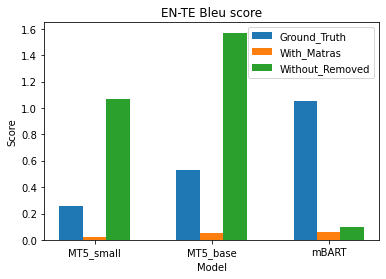

In [18]:
w = 0.2
x = ["MT5_small", "MT5_base", "mBART"]
Ground_Truth = [0.26, 0.53, 1.05]
With_Matras = [0.02, 0.05, 0.06]
Without_Matras = [1.07, 1.57, 0.10]

bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+w for i in bar2]

plt.bar(bar1, Ground_Truth, w, label="Ground_Truth")
plt.bar(bar2, With_Matras, w, label="With_Matras")
plt.bar(bar3, Without_Matras, w, label="Without_Removed")

plt.xlabel("Model")
plt.ylabel("Score")
plt.title("EN-TE Bleu score")
plt.xticks(bar1+w, x)
plt.legend()
plt.show()

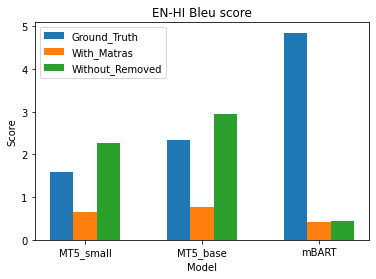

In [19]:
w = 0.2
x = ["MT5_small", "MT5_base", "mBART"]
Ground_Truth = [1.58, 2.35, 4.85]
With_Matras = [0.66, 0.78, 0.43]
Without_Matras = [2.26, 2.95, 0.45]

bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+w for i in bar2]

plt.bar(bar1, Ground_Truth, w, label="Ground_Truth")
plt.bar(bar2, With_Matras, w, label="With_Matras")
plt.bar(bar3, Without_Matras, w, label="Without_Removed")

plt.xlabel("Model")
plt.ylabel("Score")
plt.title("EN-HI Bleu score")
plt.xticks(bar1+w, x)
plt.legend()
plt.show()